In [221]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
from torch.autograd import Variable
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
torch.__version__

'0.3.1b0+4cf3225'

In [222]:
class MusicTrainDataset(Dataset):
    def __init__(self):
        self.x_data = x_train
        self.y_data = y_train
        self.len = self.x_data.shape[0]
        self.x_data = torch.from_numpy(self.x_data).float()
        self.y_data = torch.from_numpy(self.y_data).long()
        # print(self.x_data)
        
    def __getitem__(self, item):
        return self.x_data[item, :], self.y_data[item]
    
    def __len__(self):
        return len(self.x_data[:, :])

In [223]:
class MusicTestDataset(Dataset):
    def __init__(self):
        self.x_data = x_test
        self.y_data = y_test
        self.len = self.x_data.shape[0]
        self.x_data = torch.from_numpy(self.x_data).float()
        self.y_data = torch.from_numpy(self.y_data).long()
        # print(self.y_data)
    
    def __getitem__(self, item):
        return self.x_data[item, :], self.y_data[item]
    
    def __len__(self):
        return len(self.x_data[:, :])

In [224]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, number_classes):
        nn.Module.__init__(self)
        self.l1 = nn.Linear(input_size, 30)
        self.l2 = nn.Linear(30, 10)
        self.softmax = nn.Softmax()
        self.relu = nn.ReLU()
    
    def forward(self, x):
        out1 = self.relu(self.l1(x))
        out2 = self.softmax(self.l2(out1))
        return out2

In [225]:
epoch_train_loss

[1.4611598253250122,
 2.460141658782959,
 1.4611833095550537,
 1.4611529111862183,
 1.8804863691329956,
 1.6491740942001343,
 1.4612046480178833,
 2.4273319244384766,
 1.9841655492782593,
 2.4429728984832764,
 2.4353911876678467,
 1.461171269416809,
 2.4611425399780273,
 1.4691426753997803,
 1.473320722579956,
 2.350986957550049,
 2.459857225418091,
 1.4829586744308472,
 2.4381046295166016,
 2.294764280319214,
 2.449315309524536,
 2.460671901702881,
 1.4685696363449097,
 2.4483067989349365,
 1.8221962451934814,
 2.445162534713745,
 2.4065017700195312,
 2.144824504852295,
 1.7768956422805786,
 1.548872470855713,
 2.437375783920288,
 2.4391965866088867,
 2.454489231109619,
 2.4479737281799316,
 2.4172821044921875,
 2.461029291152954,
 1.484857201576233,
 2.3224170207977295,
 1.543739676475525,
 2.3475348949432373,
 2.446242570877075,
 2.433014392852783,
 2.4302215576171875,
 2.4544854164123535,
 2.4519879817962646,
 2.342043161392212,
 2.4546778202056885,
 1.6114541292190552,
 1.51290023

C:\Users\Mahesh.Bhosale\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  # This is added back by InteractiveShellApp.init_path()


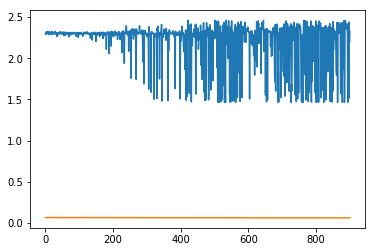

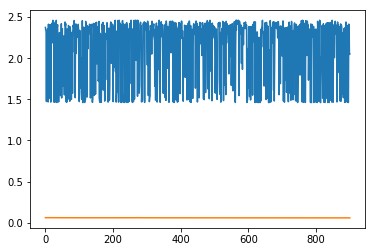

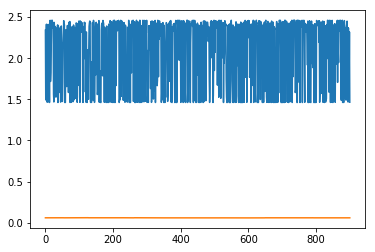

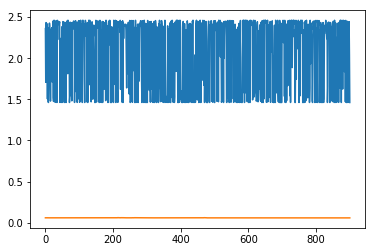

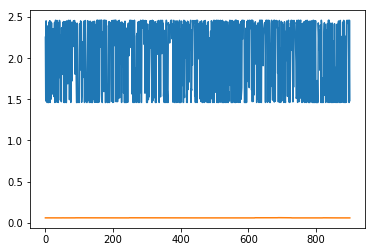

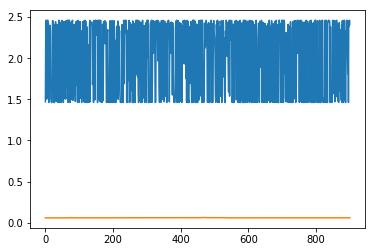

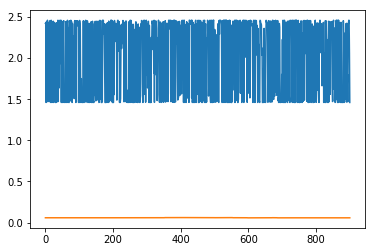

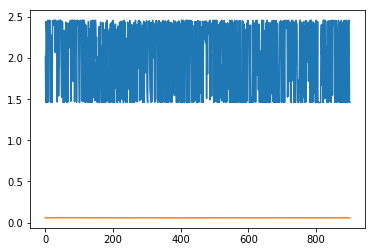

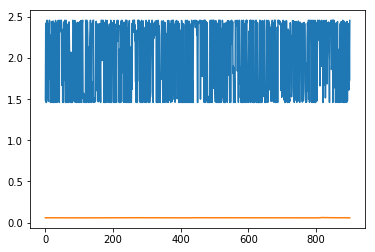

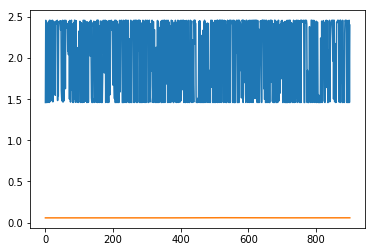

In [226]:
if __name__ == "__main__":
    input_size = 28
    batch_size = 35
    num_classes = 10
    learning_rate = 0.2
    number_epochs = 1000
    torch.manual_seed(100)
    data = pd.read_csv('clean_data_norm.csv', delimiter=',', header = 0)
    data.replace(to_replace='blues', value=0, inplace=True)
    data.replace(to_replace='classical', value=1, inplace=True)
    data.replace(to_replace='country', value=2, inplace=True)
    data.replace(to_replace='disco', value=3, inplace=True)
    data.replace(to_replace='hiphop', value=4, inplace=True)
    data.replace(to_replace='jazz', value=5, inplace=True)
    data.replace(to_replace='metal', value=6, inplace=True)
    data.replace(to_replace='pop', value=7, inplace=True)
    data.replace(to_replace='reggae', value=8, inplace=True)
    data.replace(to_replace='rock', value=9, inplace=True)
    x_data = data.iloc[:, :-1]
    y_data = data.iloc[:, -1:]
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.1, random_state=333, stratify=data.iloc[:, -1:])
    x_train = x_train.as_matrix()
    x_test = x_test.as_matrix()
    y_train = y_train.as_matrix()
    y_test = y_test.as_matrix()
    model = NeuralNet(input_size, num_classes)
    music_train_data = MusicTrainDataset()
    train_loader = DataLoader(dataset=music_train_data, batch_size=1, shuffle=True, num_workers=0)
    music_test_data = MusicTestDataset()
    test_loader = DataLoader(dataset=music_test_data, batch_size=1, shuffle=True, num_workers=0)
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
    training_losses = []
    testing_losses = []
    iterations = []
    num_train_examples = train_loader.__len__()*batch_size
    num_test_examples = test_loader.__len__()*batch_size
    total_train_loss = 0.0
    total_test_loss = 0.0
    for epoch in range(10):
        count = 0
        epoch_train_loss = []
        epoch_test_loss = []
        examples_seen = []
        for _index, train_data in enumerate(train_loader):
            x_train, y_train = train_data
            x_train = Variable(x_train)
            y_train = Variable(y_train)
            y_train = y_train.squeeze(1)
            optimizer.zero_grad()
            outputs = model(x_train)
            train_loss = criterion(outputs, y_train)
            epoch_train_loss.append(train_loss.data[0])
            total_train_loss += train_loss.data[0]
            train_loss.backward()
            optimizer.step()
            for index, test_data in enumerate(test_loader):
                x_test, y_test = test_data
                x_test = Variable(x_test)
                y_test = Variable(y_test)
                y_pred = model(x_test)
                y_test = y_test.squeeze(1)
                test_loss = criterion(y_pred, y_test)
                total_test_loss += test_loss.data[0]
            total_test_loss /= num_test_examples
            epoch_test_loss.append(total_test_loss)
            count += 1
            examples_seen.append(count)
        axes = plt.gca()
        plt.plot(examples_seen, epoch_train_loss)
        plt.plot(examples_seen, epoch_test_loss)
        plt.show()

In [227]:
if __name__ == "__main__":
    input_size = 28
    batch_size = 35
    num_classes = 10
    learning_rate = 0.2
    number_epochs = 1000
    torch.manual_seed(100)
    data = pd.read_csv('clean_data_norm.csv', delimiter=',', header = 0)
    data.replace(to_replace='blues', value=0, inplace=True)
    data.replace(to_replace='classical', value=1, inplace=True)
    data.replace(to_replace='country', value=2, inplace=True)
    data.replace(to_replace='disco', value=3, inplace=True)
    data.replace(to_replace='hiphop', value=4, inplace=True)
    data.replace(to_replace='jazz', value=5, inplace=True)
    data.replace(to_replace='metal', value=6, inplace=True)
    data.replace(to_replace='pop', value=7, inplace=True)
    data.replace(to_replace='reggae', value=8, inplace=True)
    data.replace(to_replace='rock', value=9, inplace=True)
    x_data = data.iloc[:, :-1]
    y_data = data.iloc[:, -1:]
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.1, random_state=333, stratify=data.iloc[:, -1:])
    x_train = x_train.as_matrix()
    x_test = x_test.as_matrix()
    y_train = y_train.as_matrix()
    y_test = y_test.as_matrix()
    model = NeuralNet(input_size, num_classes)
    music_train_data = MusicTrainDataset()
    train_loader = DataLoader(dataset=music_train_data, batch_size=batch_size, shuffle=True, num_workers=0)
    music_test_data = MusicTestDataset()
    test_loader = DataLoader(dataset=music_test_data, batch_size=batch_size, shuffle=True, num_workers=0)
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
    training_losses = []
    testing_losses = []
    iterations = []
    num_train_examples = train_loader.__len__()*batch_size
    num_test_examples = test_loader.__len__()*batch_size
    total_train_loss = 0.0
    total_test_loss = 0.0
    for epoch in range(number_epochs):
        count = 0
        for _index, train_data in enumerate(train_loader):
            x_train, y_train = train_data
            x_train = Variable(x_train)
            y_train = Variable(y_train)
            y_train = y_train.squeeze(1)
            optimizer.zero_grad()
            outputs = model(x_train)
            train_loss = criterion(outputs, y_train)
            total_train_loss += train_loss.data[0]
            train_loss.backward()
            optimizer.step()
        for index, test_data in enumerate(test_loader):
            x_test, y_test = test_data
            x_test = Variable(x_test)
            y_test = Variable(y_test)
            y_pred = model(x_test)
            y_test = y_test.squeeze(1)
            test_loss = criterion(y_pred, y_test)
            total_test_loss += test_loss.data[0]
        total_train_loss /= num_train_examples
        total_test_loss /= num_test_examples
        training_losses.append(total_train_loss)
        testing_losses.append(total_test_loss)
        iterations.append(epoch)
        print(f'{epoch} : Train Loss : [{total_train_loss}] Test Loss : [{total_test_loss}]')

C:\Users\Mahesh.Bhosale\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  # This is added back by InteractiveShellApp.init_path()


0 : Train Loss : [0.06576213391272576] Test Loss : [0.06572519484020414]
1 : Train Loss : [0.06575587460793471] Test Loss : [0.06626235064465442]
2 : Train Loss : [0.06563496828809978] Test Loss : [0.06610126595805549]
3 : Train Loss : [0.06537235438431506] Test Loss : [0.0657170427508875]
4 : Train Loss : [0.06480674102476235] Test Loss : [0.06523772706367452]
5 : Train Loss : [0.06441438936220607] Test Loss : [0.06509809689198012]
6 : Train Loss : [0.06427899495087075] Test Loss : [0.06495500566434047]
7 : Train Loss : [0.064202803214995] Test Loss : [0.06492166755330668]
8 : Train Loss : [0.06412877514449734] Test Loss : [0.06482454529241267]
9 : Train Loss : [0.06405003924372528] Test Loss : [0.06474826415293136]
10 : Train Loss : [0.0639798194067295] Test Loss : [0.06474461533530484]
11 : Train Loss : [0.06389006882249836] Test Loss : [0.06463310968099169]
12 : Train Loss : [0.06378470708281718] Test Loss : [0.06446665788938301]
13 : Train Loss : [0.0636666644934917] Test Loss : [

117 : Train Loss : [0.05603456008285186] Test Loss : [0.057360432718942464]
118 : Train Loss : [0.0559580467505753] Test Loss : [0.05743295145578564]
119 : Train Loss : [0.056019931850673894] Test Loss : [0.05731267192936581]
120 : Train Loss : [0.05596561893637128] Test Loss : [0.0574360047502155]
121 : Train Loss : [0.055914536103931704] Test Loss : [0.05739935367327156]
122 : Train Loss : [0.05588118455238102] Test Loss : [0.05721948564327154]
123 : Train Loss : [0.05590032068606072] Test Loss : [0.0571295509281874]
124 : Train Loss : [0.05581856139116362] Test Loss : [0.05735095728914238]
125 : Train Loss : [0.05581251383229067] Test Loss : [0.05730664355314726]
126 : Train Loss : [0.05579891575562216] Test Loss : [0.057193357568199384]
127 : Train Loss : [0.05572920804902734] Test Loss : [0.057197876949359634]
128 : Train Loss : [0.055751259966273066] Test Loss : [0.057157865669795915]
129 : Train Loss : [0.05570509282643495] Test Loss : [0.05723802921797045]
130 : Train Loss : [0

229 : Train Loss : [0.053958316027622] Test Loss : [0.05596904621954973]
230 : Train Loss : [0.053915578082563566] Test Loss : [0.056066653148185285]
231 : Train Loss : [0.053930010723494966] Test Loss : [0.05578728082649151]
232 : Train Loss : [0.05390418803552941] Test Loss : [0.05591178466052027]
233 : Train Loss : [0.05388220707177963] Test Loss : [0.05591993450448344]
234 : Train Loss : [0.05385727407032317] Test Loss : [0.05582942555057865]
235 : Train Loss : [0.05390523653241625] Test Loss : [0.05589005625339802]
236 : Train Loss : [0.05385240668758163] Test Loss : [0.05573103288583268]
237 : Train Loss : [0.05382191947915511] Test Loss : [0.05573476245098382]
238 : Train Loss : [0.05381126233304178] Test Loss : [0.05578143264472419]
239 : Train Loss : [0.05378442669775421] Test Loss : [0.05585166678216911]
240 : Train Loss : [0.05374028046996675] Test Loss : [0.055634394984906334]
241 : Train Loss : [0.05376198948696061] Test Loss : [0.05577524744992659]
242 : Train Loss : [0.0

347 : Train Loss : [0.05262919069761169] Test Loss : [0.05462652839102721]
348 : Train Loss : [0.05260347437729148] Test Loss : [0.05470627323]
349 : Train Loss : [0.05257513286333675] Test Loss : [0.05504933479997926]
350 : Train Loss : [0.05255858219326701] Test Loss : [0.05475666101807388]
351 : Train Loss : [0.05261449032341453] Test Loss : [0.05471171783795754]
352 : Train Loss : [0.05260703253673235] Test Loss : [0.054646344586723454]
353 : Train Loss : [0.0525954518703306] Test Loss : [0.05479327470163044]
354 : Train Loss : [0.05263812065495542] Test Loss : [0.0547788839141622]
355 : Train Loss : [0.05252758298077834] Test Loss : [0.054467812701444865]
356 : Train Loss : [0.05250169999033714] Test Loss : [0.05473319136457198]
357 : Train Loss : [0.05252450182942932] Test Loss : [0.054630772598523614]
358 : Train Loss : [0.052537165822071345] Test Loss : [0.05453952168971715]
359 : Train Loss : [0.05253482411058556] Test Loss : [0.054759747264456225]
360 : Train Loss : [0.052482

465 : Train Loss : [0.051723781596538065] Test Loss : [0.05429888025629618]
466 : Train Loss : [0.05172286276346916] Test Loss : [0.05410782612086366]
467 : Train Loss : [0.051686358821308294] Test Loss : [0.054131821613152914]
468 : Train Loss : [0.05173619351584823] Test Loss : [0.05397793296613996]
469 : Train Loss : [0.05171509688330438] Test Loss : [0.05415725562720437]
470 : Train Loss : [0.05168786332835681] Test Loss : [0.053948615832342894]
471 : Train Loss : [0.05168450405621517] Test Loss : [0.05420287994016934]
472 : Train Loss : [0.05162217015017546] Test Loss : [0.0544123339792537]
473 : Train Loss : [0.05170690478197809] Test Loss : [0.053986507075306396]
474 : Train Loss : [0.05168080185207814] Test Loss : [0.05376308832298457]
475 : Train Loss : [0.051715066536162285] Test Loss : [0.054122811808825555]
476 : Train Loss : [0.051620260099901706] Test Loss : [0.054092502653169644]
477 : Train Loss : [0.05168404436725] Test Loss : [0.054133241290701455]
478 : Train Loss : 

582 : Train Loss : [0.05102248148444746] Test Loss : [0.05362571797930506]
583 : Train Loss : [0.05097735211041738] Test Loss : [0.05363909417884343]
584 : Train Loss : [0.05098584327379848] Test Loss : [0.05398698118135066]
585 : Train Loss : [0.051034701296624685] Test Loss : [0.05373526371346624]
586 : Train Loss : [0.05099863706101094] Test Loss : [0.05382608693335045]
587 : Train Loss : [0.050929574334338354] Test Loss : [0.05369453764354365]
588 : Train Loss : [0.050897327783958946] Test Loss : [0.053817265860277054]
589 : Train Loss : [0.051008822201507056] Test Loss : [0.053265745238955414]
590 : Train Loss : [0.05100193141764208] Test Loss : [0.053809845398309644]
591 : Train Loss : [0.05098798565941925] Test Loss : [0.053979604243763316]
592 : Train Loss : [0.05098587303690943] Test Loss : [0.053656049841921745]
593 : Train Loss : [0.05093277987575064] Test Loss : [0.05353358310625933]
594 : Train Loss : [0.05095520034265098] Test Loss : [0.05391037264723304]
595 : Train Loss

699 : Train Loss : [0.05052624044114829] Test Loss : [0.0537606032672306]
700 : Train Loss : [0.05054401366589809] Test Loss : [0.05363166743988346]
701 : Train Loss : [0.050538084784364945] Test Loss : [0.054030609170073046]
702 : Train Loss : [0.0505103284424906] Test Loss : [0.05355377038357252]
703 : Train Loss : [0.05057337210011421] Test Loss : [0.05339060123383409]
704 : Train Loss : [0.05053689665765369] Test Loss : [0.05344959307243138]
705 : Train Loss : [0.05059142836051951] Test Loss : [0.05348579052975535]
706 : Train Loss : [0.05050179298902298] Test Loss : [0.05366377073279362]
707 : Train Loss : [0.05053316312107176] Test Loss : [0.053839940498532884]
708 : Train Loss : [0.05053431200410281] Test Loss : [0.05341832655450902]
709 : Train Loss : [0.05052389764968538] Test Loss : [0.05346207777827327]
710 : Train Loss : [0.05047660203713838] Test Loss : [0.05377243860942687]
711 : Train Loss : [0.05053919506959359] Test Loss : [0.05370232821498433]
712 : Train Loss : [0.05

815 : Train Loss : [0.05023575165667804] Test Loss : [0.053239074146876585]
816 : Train Loss : [0.050297983010815166] Test Loss : [0.05354626260859749]
817 : Train Loss : [0.050246211337868774] Test Loss : [0.05351485480227763]
818 : Train Loss : [0.0502341147006735] Test Loss : [0.053914031686230185]
819 : Train Loss : [0.050276334769968276] Test Loss : [0.053404463674358374]
820 : Train Loss : [0.05023643085773987] Test Loss : [0.0534046038119162]
821 : Train Loss : [0.05025491409587135] Test Loss : [0.053545624059465356]
822 : Train Loss : [0.050236127635204395] Test Loss : [0.05332697715117843]
823 : Train Loss : [0.050231120636459195] Test Loss : [0.05330112900864078]
824 : Train Loss : [0.050210204383884155] Test Loss : [0.05338340291206146]
825 : Train Loss : [0.050268861320277664] Test Loss : [0.05339502089447673]
826 : Train Loss : [0.05026758067846589] Test Loss : [0.05351132086281047]
827 : Train Loss : [0.05026467252949044] Test Loss : [0.05352018730331641]
828 : Train Loss

930 : Train Loss : [0.05001319349821988] Test Loss : [0.05362237293691785]
931 : Train Loss : [0.050050671686849055] Test Loss : [0.05340977971508118]
932 : Train Loss : [0.05001526605492341] Test Loss : [0.053587412499695924]
933 : Train Loss : [0.04998044803390798] Test Loss : [0.05351915336471995]
934 : Train Loss : [0.05006461777349368] Test Loss : [0.053640665551672115]
935 : Train Loss : [0.05008519173365002] Test Loss : [0.053505308873508184]
936 : Train Loss : [0.050027504077332155] Test Loss : [0.053679643428960054]
937 : Train Loss : [0.05003572310994263] Test Loss : [0.053581018091730076]
938 : Train Loss : [0.05002904410770514] Test Loss : [0.05333012871175997]
939 : Train Loss : [0.05005016537022253] Test Loss : [0.05356540287602799]
940 : Train Loss : [0.05003934839500516] Test Loss : [0.05321954110360041]
941 : Train Loss : [0.04997668560759853] Test Loss : [0.05335483763133684]
942 : Train Loss : [0.050013744546122785] Test Loss : [0.0536534613856735]
943 : Train Loss :

Accuracy : 61.0 %


C:\Users\Mahesh.Bhosale\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  # This is added back by InteractiveShellApp.init_path()


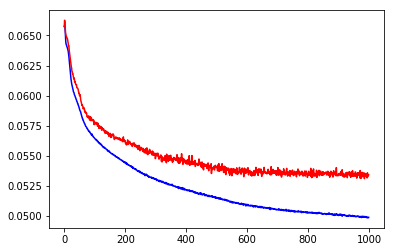

In [228]:
cnt = 0.0
tot = 0
pred_cs = []
for index, data in enumerate(test_loader):
    x, y = data
    x = x.float()
    y = y.squeeze(1)
    x = Variable(x)
    y = Variable(y)
    y_pred = model(x)
    preds = y_pred.data.numpy().tolist()
    expecteds = y.data.numpy().tolist()
    for index, pred in enumerate(preds):
        pred_c = pred.index(max(pred))
        pred_cs.append(pred_c)
        if pred_c == expecteds[index]:
            cnt += 1
        tot += 1
#         print(preds, pred_cs)
print(f'Accuracy : {cnt * 100 /tot} %')
axes = plt.gca()
plt.plot(iterations, training_losses, '-b', label = 'train_loss')
plt.plot(iterations, testing_losses, '-r', label = 'test_loss')
plt.show()